<a href="https://colab.research.google.com/github/Real1CM/ComputerVison/blob/main/2024_10_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### 1. 对bone-scan图像进行增强

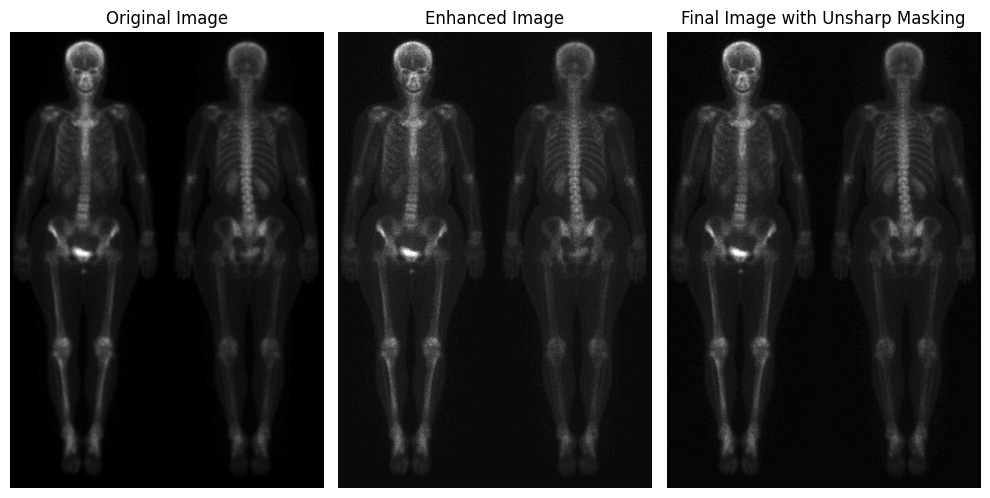

In [32]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('./1.png', 0).astype(np.float32)

laplace_kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
img_laplace = cv2.filter2D(img, -1, laplace_kernel)

img_enhance = img + 0.2 * img_laplace
img_enhance[img_enhance > 255] = 255
img_enhance[img_enhance < 0] = 0
img_enhance = img_enhance.astype(np.uint8)

blurred_img = cv2.GaussianBlur(img, (5, 5), 0)

residual = img - blurred_img

final_img = img + 1.0 * residual
final_img[final_img > 255] = 255
final_img[final_img < 0] = 0
final_img = final_img.astype(np.uint8)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img.astype(np.uint8), cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Enhanced Image")
plt.imshow(img_enhance, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Final Image with Unsharp Masking")
final_img = cv2.normalize(final_img, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
plt.imshow(final_img, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

###### 2. 实现图像混合空间增强算法

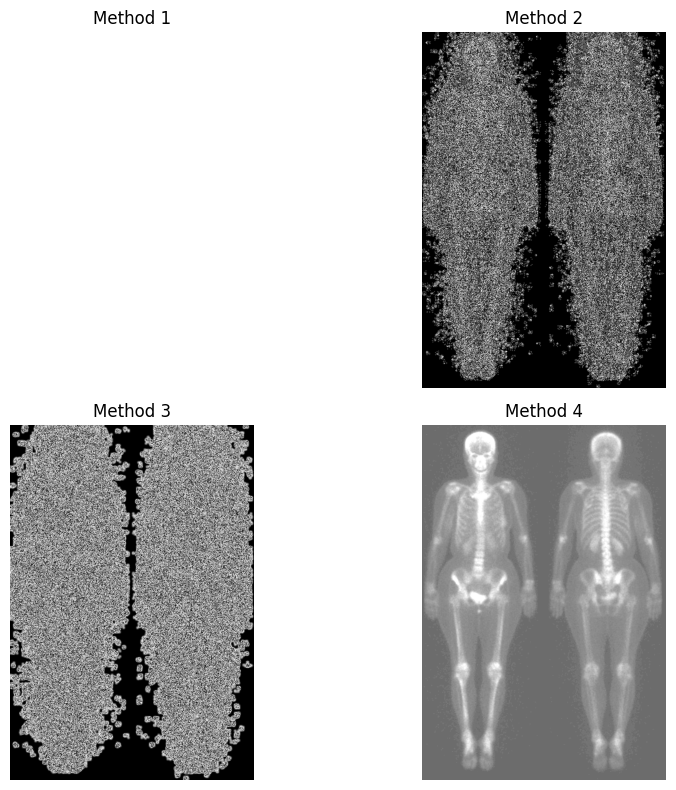

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('./1.png').astype(np.float32)
img2 = cv2.imread('./1.png').astype(np.float32)

def power_law_transform(img, gamma):
    img_normalized = img / 255.0
    img_power_law = np.power(img_normalized, gamma)
    return np.clip(img_power_law * 255, 0, 255).astype(np.uint8)

def method_1(img1, img2):
    result = img1 + img2
    result = result * result
    result = power_law_transform(result, 0.5)
    return result

def method_2(img1, img2):
    img1_gray = cv2.cvtColor(img1.astype(np.uint8), cv2.COLOR_BGR2GRAY)
    laplacian = cv2.Laplacian(img1_gray, cv2.CV_64F)
    laplacian = np.uint8(np.absolute(laplacian))
    result = laplacian + laplacian
    result = np.clip(result, 0, 255)
    result = result * result
    result = np.clip(result, 0, 255)
    result = power_law_transform(result, 0.5)
    return result

def method_3(img1, img2):
    sobelx = cv2.Sobel(img1, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(img1, cv2.CV_64F, 0, 1, ksize=5)
    sobel_combined = np.sqrt(sobelx**2 + sobely**2)

    sobel_combined = np.uint8(np.absolute(sobel_combined))

    blurred = cv2.GaussianBlur(sobel_combined, (5, 5), 0)

    result = blurred * blurred
    result = np.clip(result, 0, 255)
    result = result + result
    result = np.clip(result, 0, 255)
    result = power_law_transform(result, 0.5)
    return result

def method_4(img1, img2):
    result = img1 + img2
    result = np.clip(result, 0, 255)
    result = power_law_transform(result, 0.5)
    return result

result_1 = method_1(img1, img2)
result_2 = method_2(img1, img2)
result_3 = method_3(img1, img2)
result_4 = method_4(img1, img2)

titles = ['Method 1', 'Method 2', 'Method 3', 'Method 4']
images = [result_1, result_2, result_3, result_4]

plt.figure(figsize=(10, 8))

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()